In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('traffic_volume.csv')

In [3]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [5]:
df.isnull().sum()

holiday                0
temp                   0
rain_1h                0
snow_1h                0
clouds_all             0
weather_main           0
weather_description    0
date_time              0
traffic_volume         0
dtype: int64

In [6]:
df.describe()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
count,48204.000000,48204.000000,48204.000000,48204.000000,48204.000000
mean,281.205870,0.334264,0.000222,49.362231,3259.818355
std,13.338232,44.789133,0.008168,39.015750,1986.860670
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,272.160000,0.000000,0.000000,1.000000,1193.000000
50%,282.450000,0.000000,0.000000,64.000000,3380.000000
75%,291.806000,0.000000,0.000000,90.000000,4933.000000
max,310.070000,9831.300000,0.510000,100.000000,7280.000000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

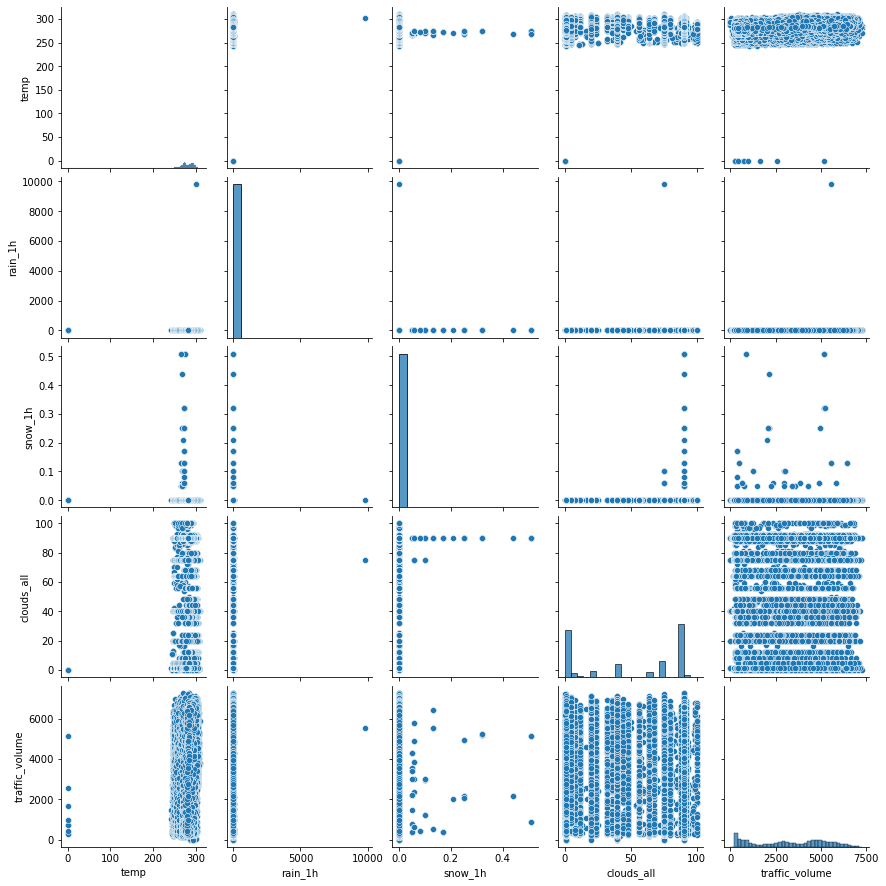

In [8]:
sns.pairplot(df)

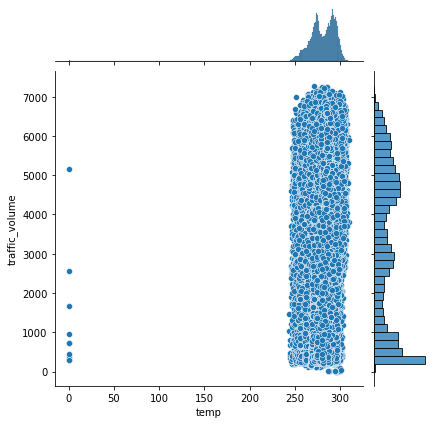

In [9]:
sns.jointplot(x = 'temp', y = 'traffic_volume', data = df)

In [10]:
df['tempC'] = df['temp'] - 273.15
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,tempC
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,10/2/2012 9:00,5545,15.13
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10/2/2012 10:00,4516,16.21
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 11:00,4767,16.43
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,10/2/2012 12:00,5026,16.98
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,10/2/2012 13:00,4918,17.99


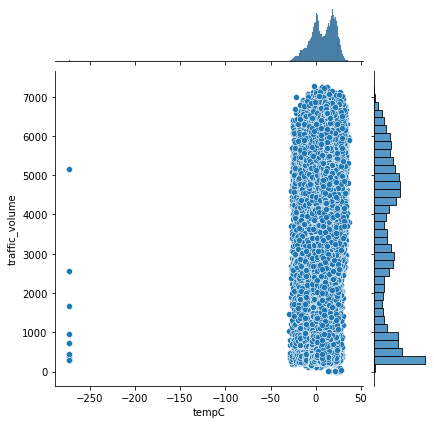

In [11]:
sns.jointplot(x = 'tempC', y = 'traffic_volume', data = df)

In [12]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

In [13]:
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

<ipython-input-13-3aa79d77d0b4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-13-3aa79d77d0b4>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


(44668, 10)

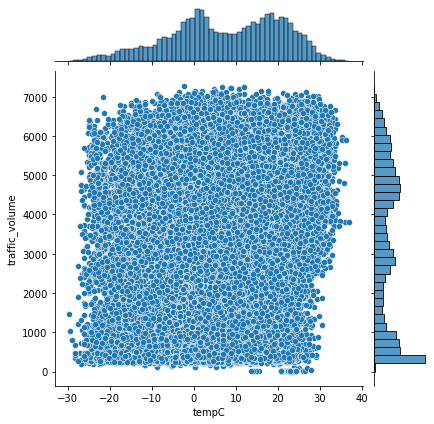

In [14]:
sns.jointplot(x = 'tempC', y = 'traffic_volume', data = df)

<AxesSubplot:xlabel='tempC', ylabel='traffic_volume'>

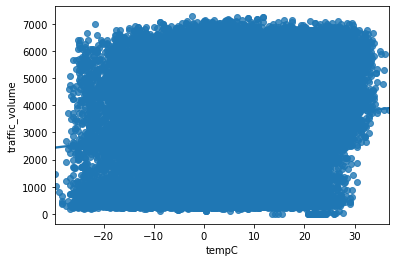

In [15]:
sns.regplot(x = 'tempC', y = 'traffic_volume', data = df)

### Applying standard scaler

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df[['temp','rain_1h','snow_1h','clouds_all']])

StandardScaler()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [20]:
model = LinearRegression()

In [21]:
X = df[['temp','rain_1h','snow_1h','clouds_all']]
y = df['traffic_volume']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

In [26]:
print("Mean Squared Error (MSE):",round(mean_squared_error(y_test,y_pred),2))
print("Coefficient of determination (R^2):",round(r2_score(y_test,y_pred),2))

Mean Squared Error (MSE): 3803495.28
Coefficient of determination (R^2): 0.03
